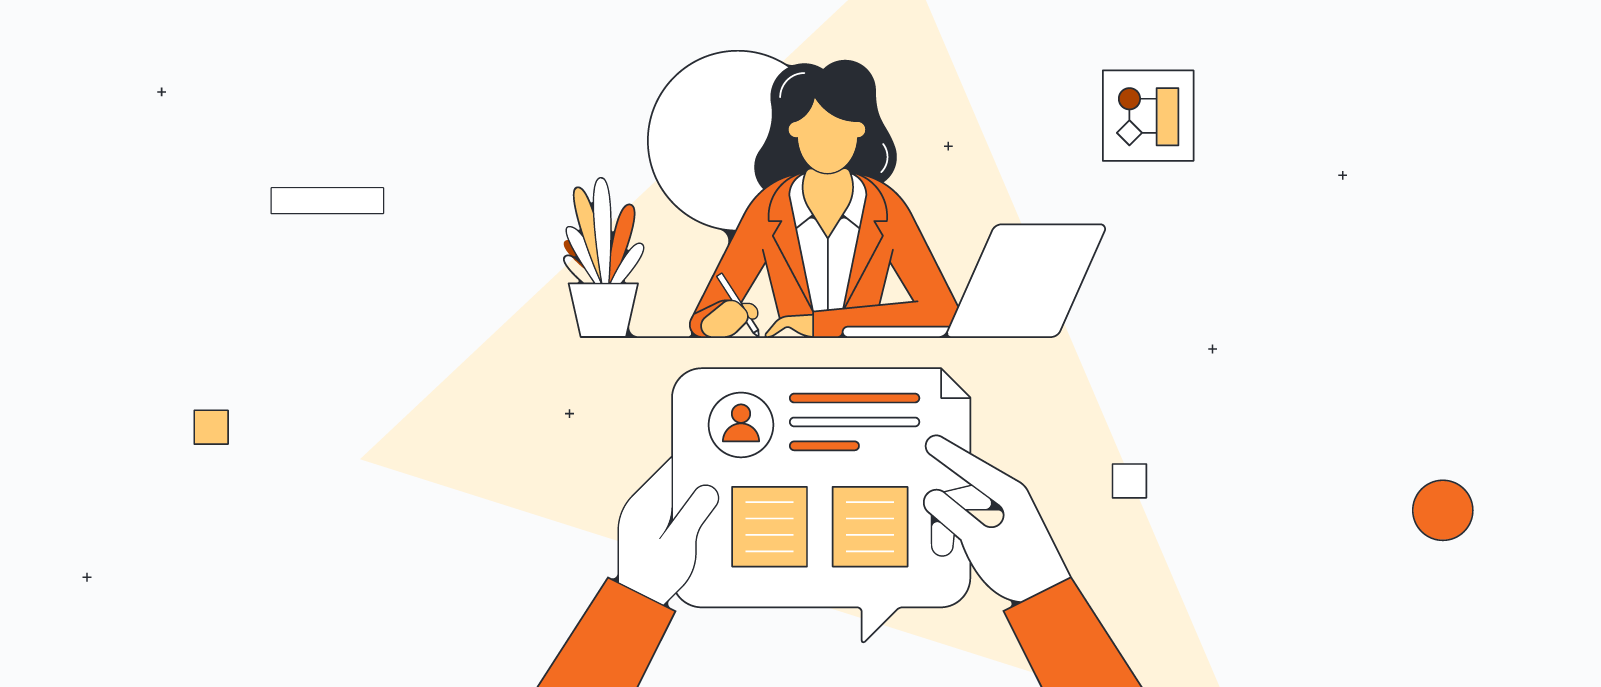


* **enrollee_id** : Unique ID for candidate
* **city**: City code
* **city_ development _index** : Development index of the city (scaled)
* **gender**: Gender of candidate
* **relevent_experience**: Relevant experience of candidate
* **enrolled_university**: Type of University course enrolled if any
* **education_level**: Education level of candidate
* **major_discipline** :Education major discipline of candidate
* **experience**: Candidate total experience in years
* **company_size**: No of employees in current employer's company
* **company_type** : Type of current employer
* **lastnewjob**: Difference in years between previous job and current job
* **training_hours**: training hours completed
* **target**: 0 – Not looking for job change, 1 – Looking for a job change

<br>

---
📖 **Table of Contents**
* [Importing Libraries](#section-one)
* [EDA (Exploratory Data Analysis)](#section-two)
  - [Initial Analysis](#section-two-one)
  - [Following Analysis](#section-two-two)
    - [Categorical Analysis](#section-two-two-one)
    - [Target Analysis](#section-two-two-two)
* [Data Preprocess](#section-three)
  - [Reduction](#section-three-one)
  - [Missing Values](#section-three-two)
  - [Outlier Detection & Handling](#section-three-three)
* [Visualization](#section-four)
  - [Univariate Analysis](#section-four-one)
    * [Categorical Analysis](#section-four-one-one)
    * [Numerical Analysis](#section-four-one-two)
    * [Target Analysis](#section-four-one-three)
  - [Bivariate Analysis](#section-four-two)
    * [Categorical vs Target](#section-four-two-one)
    * [Numerical vs Target](#section-four-two-two)
  - [Multivariate Analysis](#section-four-three)


<a name="section-one"></a>
# **Importing Libraries**

In [ ]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
import os
import json

# Download data to the desired folder

# Configure Kaggle credentials
kaggle_username = 'shubhamkishorpethe' # Replace with your Kaggle username
kaggle_key = 'KGAT_e29e9b1632984ee75f1be97dcd6d18b9'       # Replace with your Kaggle API key

# Create .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Create kaggle.json file
kaggle_json_content = {"username": kaggle_username, "key": kaggle_key}
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    json.dump(kaggle_json_content, f)

# Set appropriate permissions for kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download arashnic/hr-analytics-job-change-of-data-scientists

dataset = 'hr-analytics-job-change-of-data-scientists'
zip_file = f"{dataset}.zip"
destination_dir = f"/content/"

if not os.path.exists(zip_file):
    print(f"Error: {zip_file} not found.")
else:
    !unzip -uq $zip_file -d $destination_dir
    !rm $zip_file

Dataset URL: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
License(s): CC0-1.0
  0% 0.00/295k [00:00<?, ?B/s]
100% 295k/295k [00:00<00:00, 326MB/s]


In [ ]:
df_train_orginal = pd.read_csv("/content/aug_train.csv")
df_test_original = pd.read_csv("/content/aug_test.csv")


df_train = df_train_orginal.copy()
df_test = df_test_original.copy()

df_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.00
1,29725,city_40,0.78,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.00
2,11561,city_21,0.62,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.00
3,33241,city_115,0.79,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.00
4,666,city_162,0.77,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.88,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.00
19154,31398,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.00
19155,24576,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.00
19156,5756,city_65,0.80,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.00


<a name="section-two"></a>
# **I. EDA**

- Initial Analysis
- Following Analysis
  * Categorical Analysis
  * Target Analysis

<a name="section-two-one"></a>
## **Initial Analysis**

In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
print(f'Shape     : {df_train.shape}\n'
      f'Size      : {df_train.size}\n'
      f'Dimension : {df_train.ndim}')


Shape     : (19158, 14)
Size      : 268212
Dimension : 2


In [ ]:
print(f'Total duplicated: {sum(df_train.duplicated())}')


Total duplicated: 0


In [ ]:
df_train.nunique()

,0
enrollee_id,19158
city,123
city_development_index,93
gender,3
relevent_experience,2
enrolled_university,3
education_level,5
major_discipline,6
experience,22
company_size,8


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.00,16875.36,9616.29,1.00,8554.25,16982.50,25169.75,33380.00
city_development_index,19158.00,0.83,0.12,0.45,0.74,0.90,0.92,0.95
training_hours,19158.00,65.37,60.06,1.00,23.00,47.00,88.00,336.00
target,19158.00,0.25,0.43,0.00,0.00,0.00,0.00,1.00


In [ ]:
df_train.corr(numeric_only=True).style.background_gradient(cmap='Blues', axis=0)

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


<a name="section-two-two"></a>
## **Following Analysis**

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20, target_col=None, print_results=True):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "flaot"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = [col for col in cat_cols if col not in cat_but_car and col != target_col]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols and col != target_col]

    if print_results:
        print(f'Observations {dataframe.shape[0]}')
        print(f'Variables:  {dataframe.shape[1]}')
        print(f'cat_cols:  {len(cat_cols)}')
        print(f'num_cols:  {len(num_cols)}')
        print(f'cat_but_car:  {len(cat_but_car)}')
        print(f'num_but_cat:  {len(num_but_cat)}')
        print(f'target_col:  {len([target_col])}')

    return cat_cols, num_cols, cat_but_car, target_col

cat_cols, num_cols, cat_but_car, target_col = grab_col_names(df_train, target_col='target')

Observations 19158
Variables:  14
cat_cols:  8
num_cols:  3
cat_but_car:  2
num_but_cat:  0
target_col:  1


<a name="section-two-two-one"></a>
### **Categorical Analysis**

In [ ]:
def cat_summary(dataframe, cat_cols):
    if type(cat_cols) == list:
        for col in cat_cols:
            print(pd.DataFrame({"Count": dataframe[col].value_counts(),
                                "Ratio": 100 * dataframe[col].value_counts() / len(dataframe)}).to_markdown(numalign="center",
                                                                                                            stralign="center"))
            print("\n")
    else:
        print(pd.DataFrame({"Count": dataframe[cat_cols].value_counts(),
                            "Ratio": 100 * dataframe[cat_cols].value_counts() / len(dataframe)}).to_markdown(numalign="center",
                                                                                                             stralign="center"))

cat_summary(df_train, cat_cols)


|  gender  |  Count  |  Ratio   |
|:--------:|:-------:|:--------:|
|   Male   |  13221  | 69.0103  |
|  Female  |  1238   | 6.46205  |
|  Other   |   191   | 0.996973 |


|   relevent_experience   |  Count  |  Ratio  |
|:-----------------------:|:-------:|:-------:|
| Has relevent experience |  13792  | 71.9908 |
| No relevent experience  |  5366   | 28.0092 |


|  enrolled_university  |  Count  |  Ratio  |
|:---------------------:|:-------:|:-------:|
|     no_enrollment     |  13817  | 72.1213 |
|   Full time course    |  3757   | 19.6106 |
|   Part time course    |  1198   | 6.25326 |


|  education_level  |  Count  |  Ratio  |
|:-----------------:|:-------:|:-------:|
|     Graduate      |  11598  | 60.5387 |
|      Masters      |  4361   | 22.7633 |
|    High School    |  2017   | 10.5282 |
|        Phd        |   414   | 2.16098 |
|  Primary School   |   308   | 1.60768 |


|  major_discipline  |  Count  |  Ratio  |
|:------------------:|:-------:|:-------:|
|        STEM       

<a name="section-two-two-two"></a>
### **Target Analysis**

In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}).to_markdown(numalign="center",
                                                                                                       stralign="center"), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df_train, 'target', col)

|  gender  |  TARGET_MEAN  |
|:--------:|:-------------:|
|  Female  |   0.263328    |
|   Male   |   0.227819    |
|  Other   |    0.26178    |


|   relevent_experience   |  TARGET_MEAN  |
|:-----------------------:|:-------------:|
| Has relevent experience |    0.21469    |
| No relevent experience  |   0.338427    |


|  enrolled_university  |  TARGET_MEAN  |
|:---------------------:|:-------------:|
|   Full time course    |   0.380889    |
|   Part time course    |   0.252087    |
|     no_enrollment     |   0.211406    |


|  education_level  |  TARGET_MEAN  |
|:-----------------:|:-------------:|
|     Graduate      |    0.27979    |
|    High School    |    0.19534    |
|      Masters      |    0.2144     |
|        Phd        |   0.140097    |
|  Primary School   |   0.133117    |


|  major_discipline  |  TARGET_MEAN  |
|:------------------:|:-------------:|
|        Arts        |   0.209486    |
|  Business Degree   |   0.262997    |
|     Humanities     |   0.210762    |


In [ ]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}).to_markdown(numalign="center",
                                                                             stralign="center"), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df_train, 'target', col)

|  target  |  enrollee_id  |
|:--------:|:-------------:|
|    0     |    16601.2    |
|    1     |    17700.8    |


|  target  |  city_development_index  |
|:--------:|:------------------------:|
|    0     |         0.853139         |
|    1     |         0.755719         |


|  target  |  training_hours  |
|:--------:|:----------------:|
|    0     |     66.1138      |
|    1     |     63.1185      |




<a name="#section-three"></a>
# **II. Preprocess**

* Reduction
* Missing Values
* Outlier Detection & Handling


<a name="section-three-one"></a>
## **Reduction**

In [ ]:
df_train.drop(['enrollee_id'], axis=1, inplace=True)
df_test.drop(['enrollee_id'], axis=1, inplace=True)

num_cols.remove('enrollee_id')

<a name="section-three-two"></a>
## **Missing Values**

In [ ]:
def check_missing_value(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
#%%
check_missing_value(df_train)

                     n_miss  ratio
company_type           6140  32.05
company_size           5938  30.99
gender                 4508  23.53
major_discipline       2813  14.68
education_level         460   2.40
last_new_job            423   2.21
enrolled_university     386   2.01
experience               65   0.34


<a name="section-three-three"></a>
## **Outlier Detection & Handling**

In [ ]:
#%%
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return  low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col, check_outlier(df_train, col))

city_development_index False
training_hours False


<a name="section-four"></a>
# **III. Visualization**

* Univariate Analysis
  - Categorical Analysis
  - Numerical Analysis
  - Target Analysis
* Bivariate Analysis
  - Categorical vs Target
  - Numerical vs Target
* Multivariate Analysis
  - Correlation Matrix
  - Pairplot

<a name="section-four-one"></a>
## **Univariate Analysis**


<a name="section-four-one-one"></a>
### **Categorical Analysis**

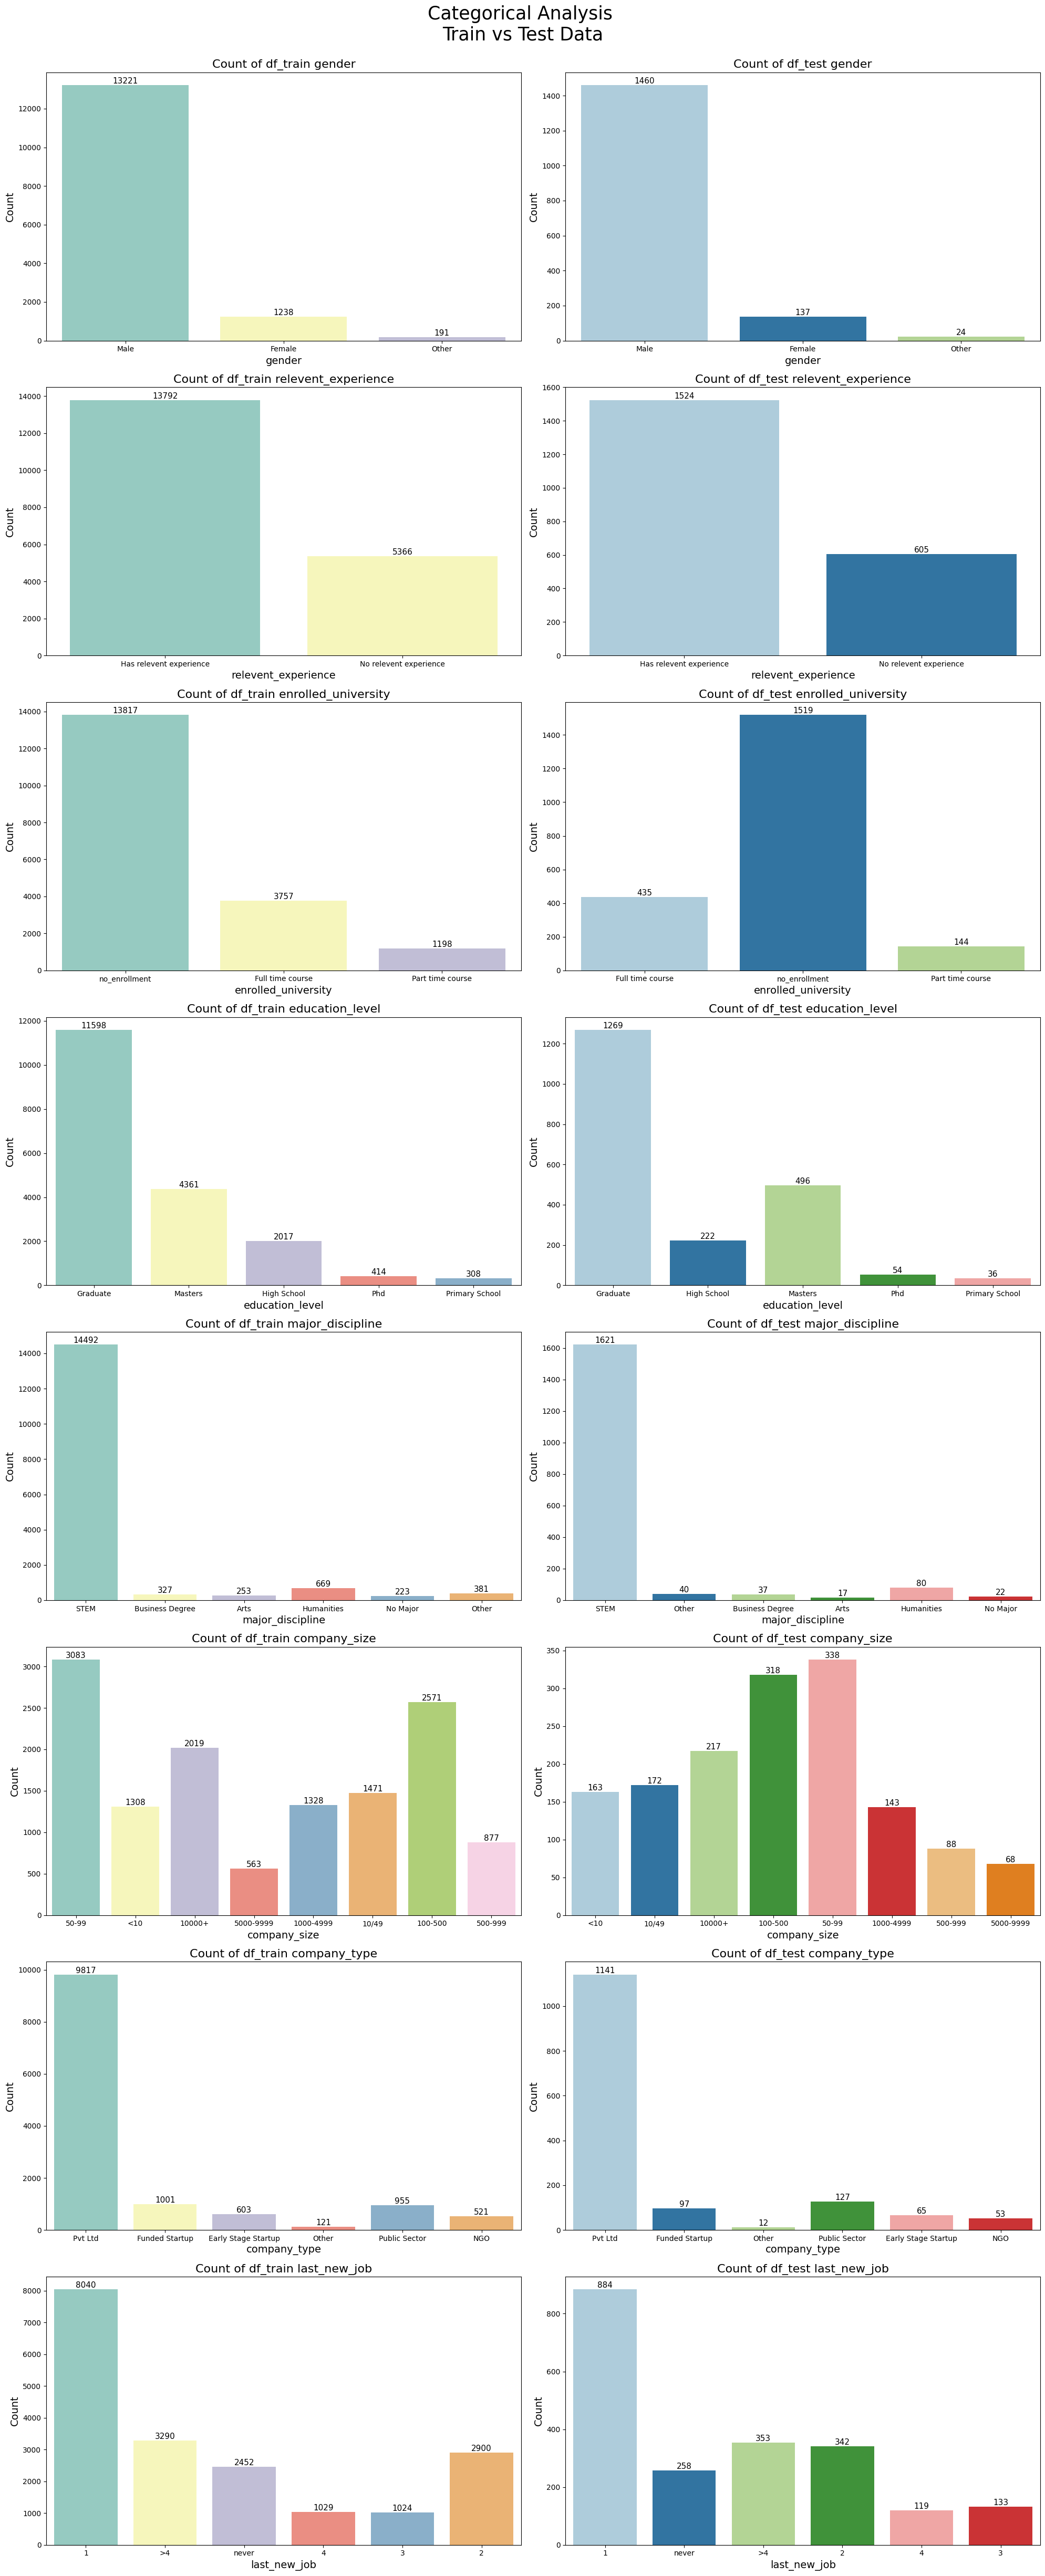

In [ ]:
def plot_bar_test_train(df_train, df_test, features, n_cols):
    n_rows = (len(features) - 1) // n_cols + 1
    fig, axs = plt.subplots(len(features), n_cols, figsize = (20, 50))

    for n, feature in enumerate(features):
        ax0 = sns.countplot(x=df_train[feature],
                            hue=df_train[feature],
                            legend=False,
                            ax=axs[n, 0],
                            palette='Set3')
        ax1 = sns.countplot(x=df_test[feature],
                            hue=df_test[feature],
                            legend=False,
                            ax=axs[n, 1],
                            palette='Paired')

        for ax in [ax0, ax1]:
            for container in ax.containers:
                 ax.bar_label(container, fontsize=11)

            ax.set_xlabel(f'{feature}', fontsize=14)
            ax.set_ylabel('Count', fontsize=14)
            if ax == ax0:
                ax.set_title(f"Count of df_train {feature}", fontsize=16)
            else:
                 ax.set_title(f"Count of df_test {feature}", fontsize=16)

    fig.suptitle("Categorical Analysis \nTrain vs Test Data", fontsize = 25)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
plot_bar_test_train(df_train, df_test, cat_cols, 2)

<a name="section-four-one-two"></a>
### **Numerical Analysis**

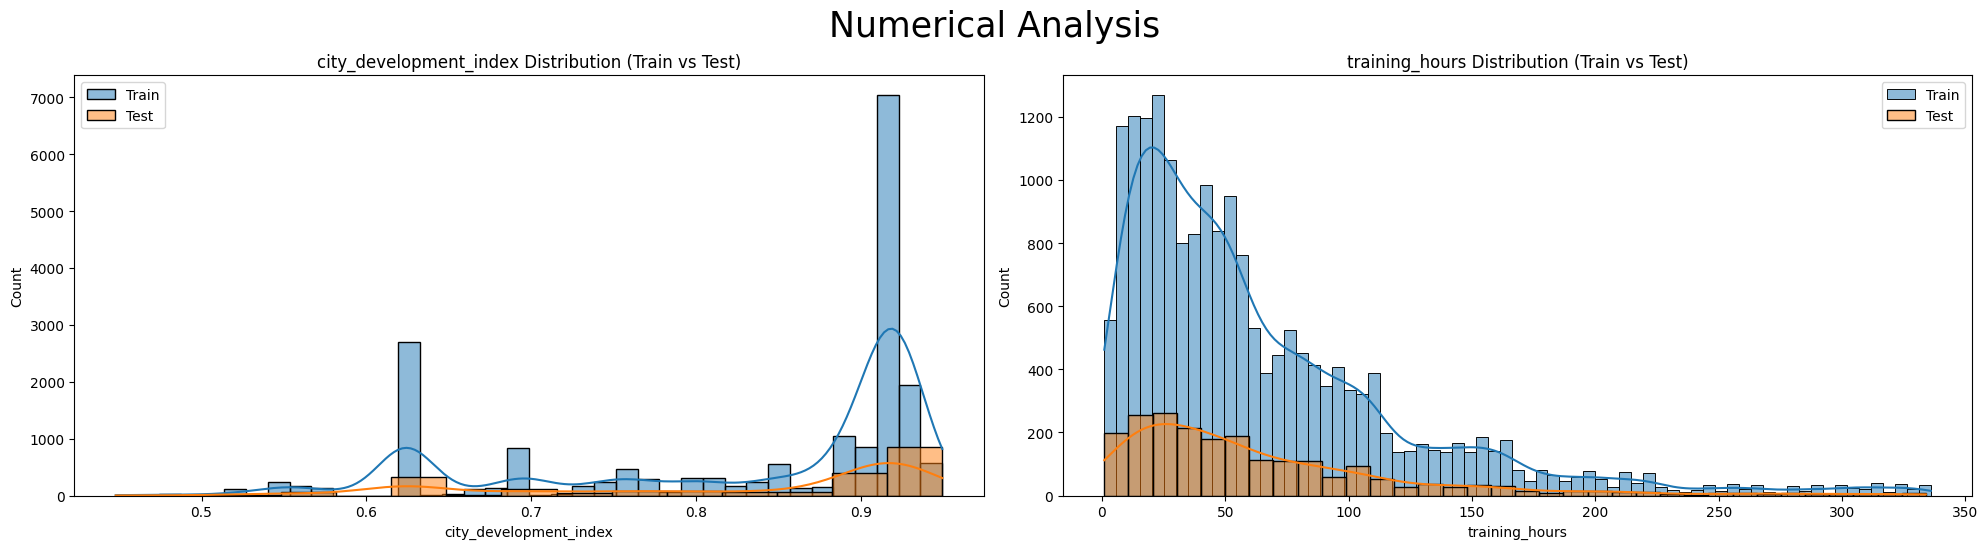

In [ ]:
def plot_histograms(df_train, df_test, features, target_col, n_cols=3):
    n_rows = (len(features) - 1) // n_cols + 1

    fig, axs = plt.subplots(len(features), n_cols, figsize = (20, 10))
    axs = axs.flatten()

    for i, var_name in enumerate(features):
            ax = axs[i]
            sns.histplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.histplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    for n in range(n_rows*n_cols*2):
        if not axs.flat[n].lines:
            axs.flat[n].set_visible(False)

    fig.suptitle("Numerical Analysis", fontsize = 25)
    plt.tight_layout()
    plt.show()

plot_histograms(df_train, df_test, num_cols,target_col, 2)

<a name="section-four-one-three"></a>
### **Target Analysis**

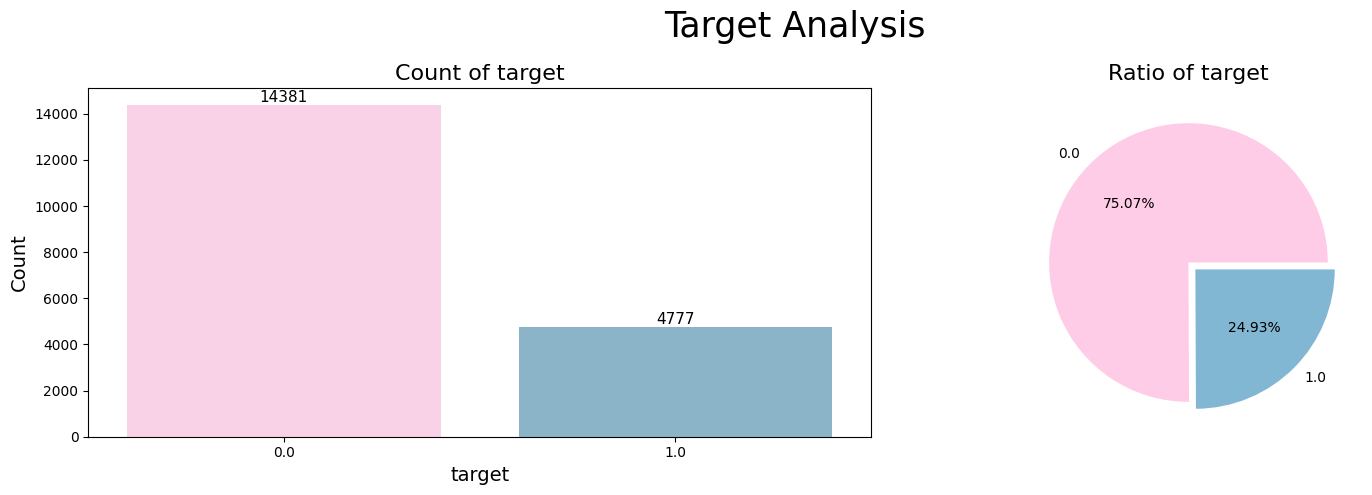

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (16, 5))

# Countplot
ax = sns.countplot(data=df_train,
                   x=df_train[target_col],
                   hue=df_train[target_col],
                   legend=False,
                   ax=axs[0],
                   palette=["#ffcce7", "#81b7d2"]);

for container in ax.containers:
      ax.bar_label(container, fontsize=11)

ax.set_xlabel(f'{target_col}', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title(f"Count of {target_col}", fontsize=16)

# Pie plot
ax2 = df_train[target_col].value_counts().plot.pie(explode=[0,0.07],
                                                   ylabel='',
                                                   ax = axs[1],
                                                   colors=["#ffcce7", "#81b7d2"],
                                                   autopct='%.2f%%');
axs[1].set_title(f"Ratio of {target_col}", fontsize=16);
fig.suptitle("Target Analysis", fontsize = 25)
plt.tight_layout()
plt.show()

<a name="section-four-two"></a>
## **Bivariate Analysis**

<a name="section-four-two-one"></a>
### **Categorical vs Target**

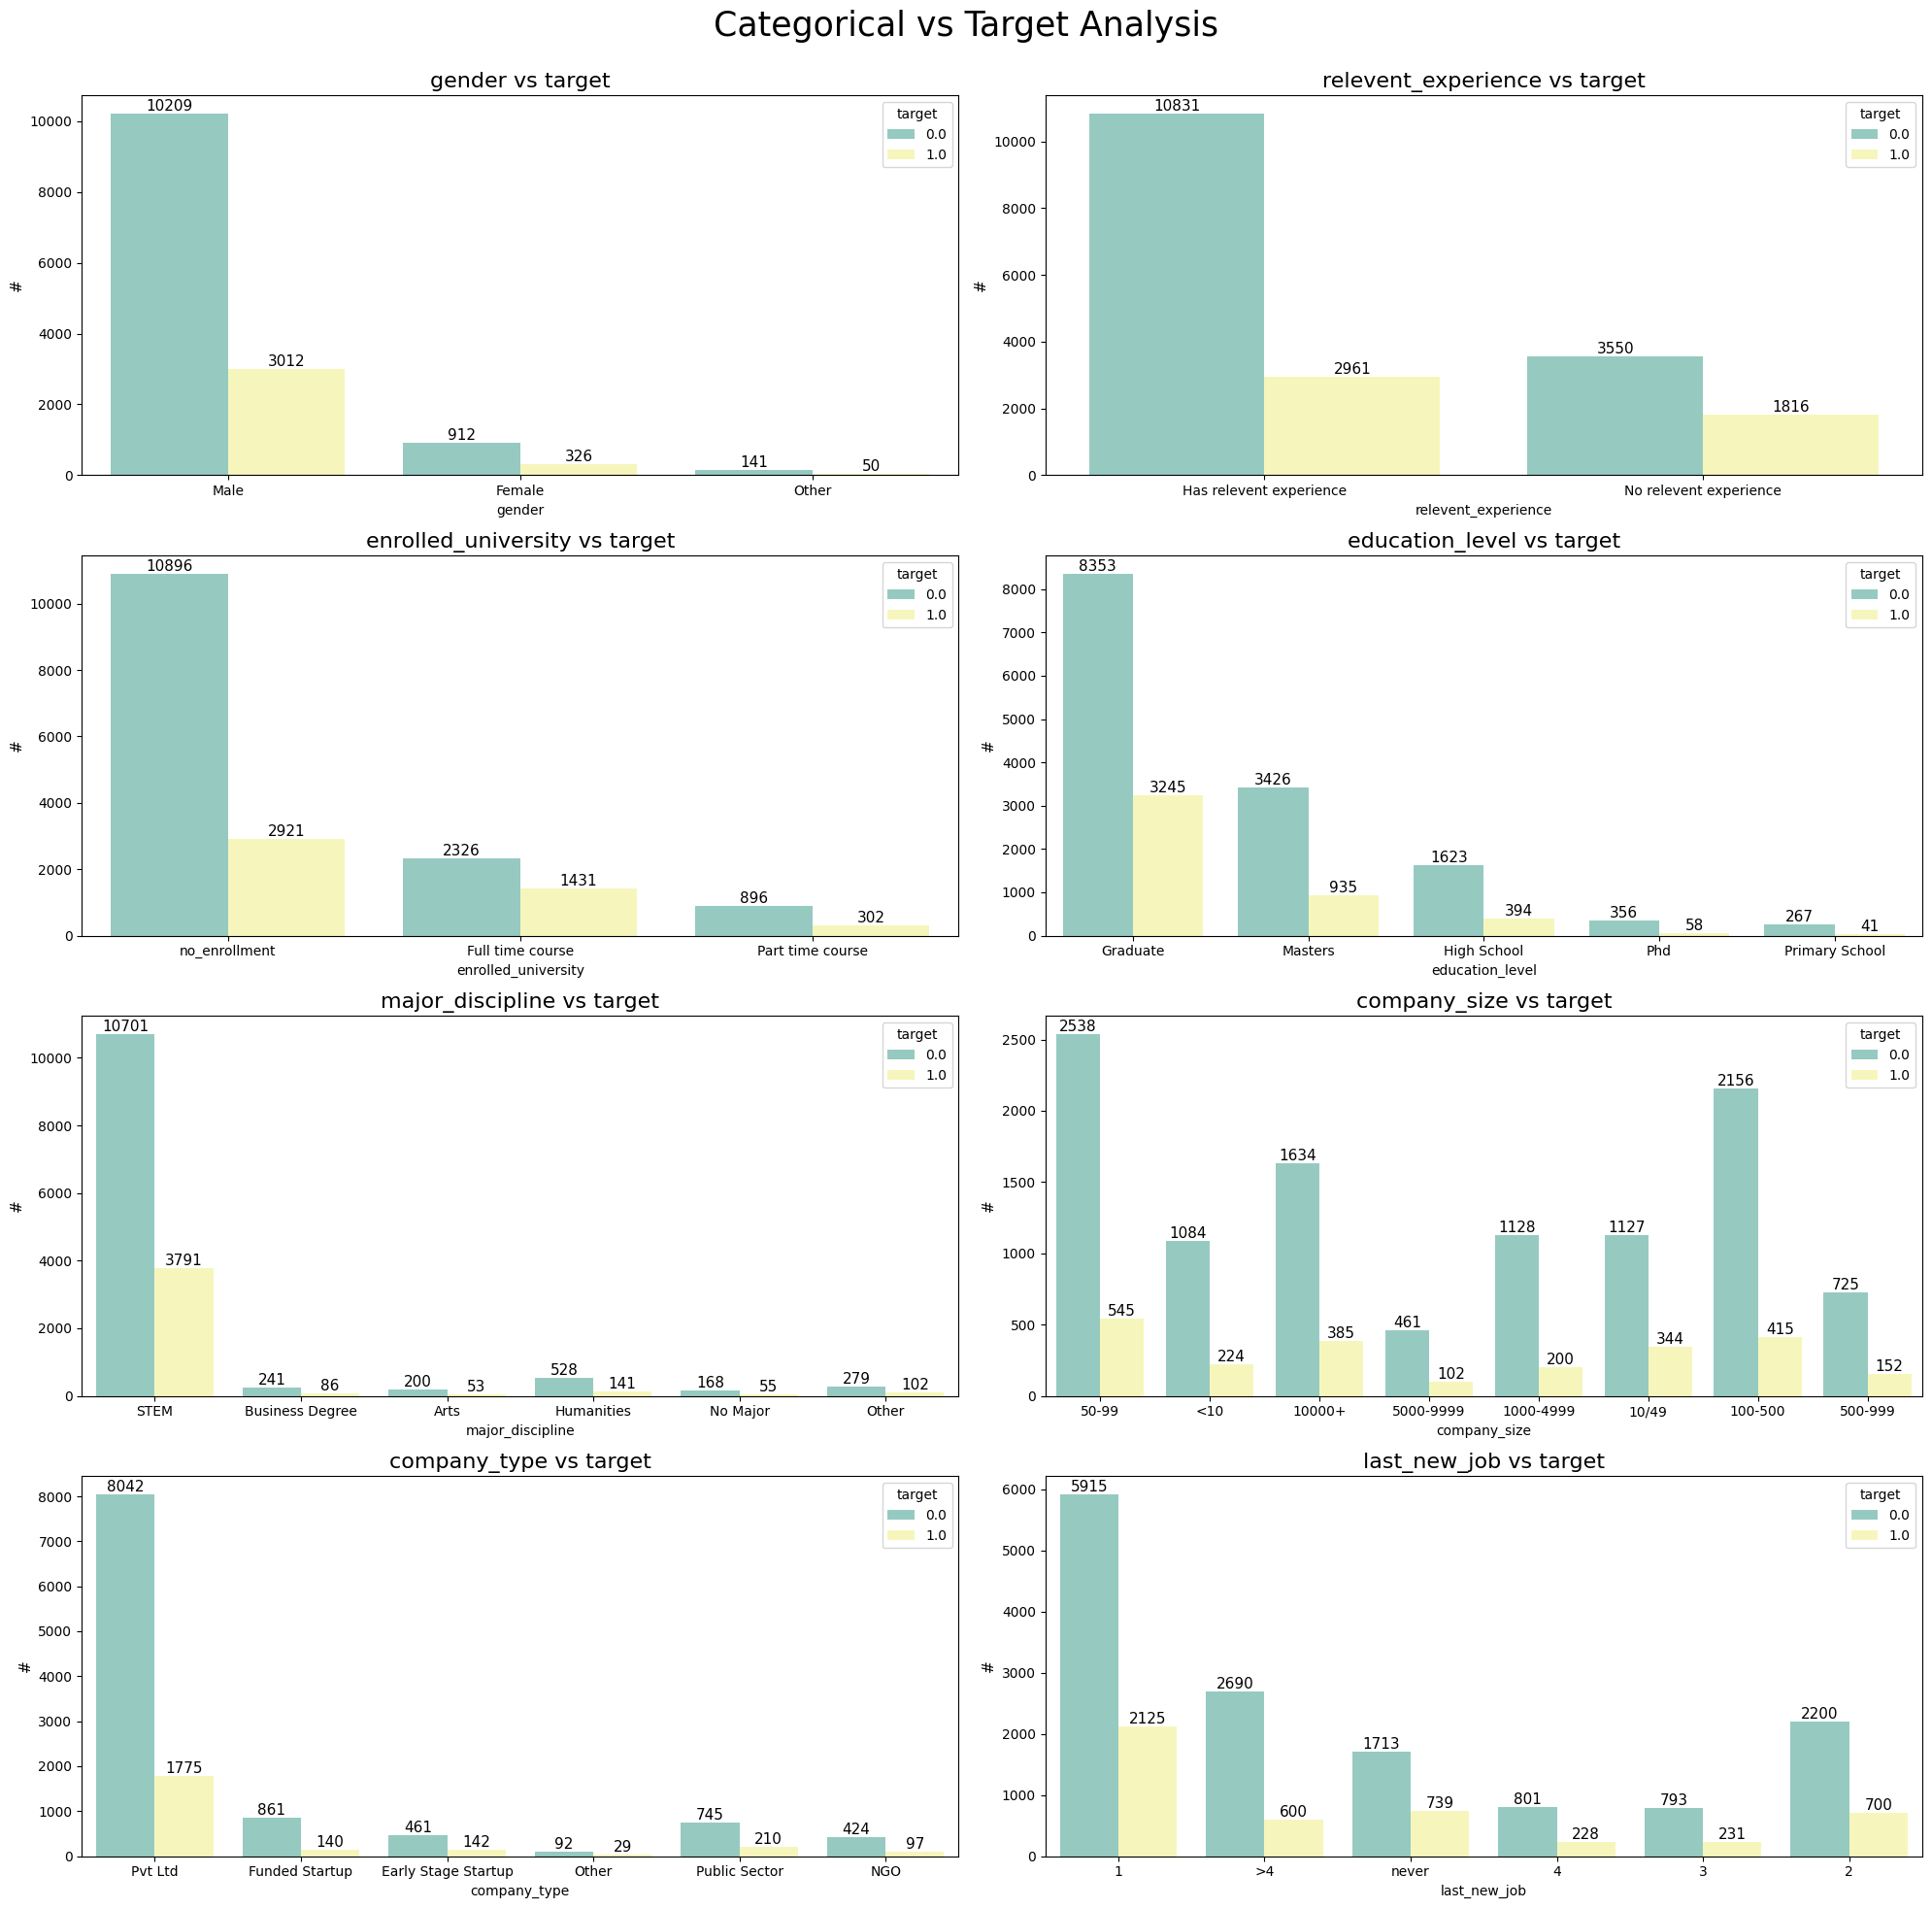

In [ ]:
def plot_bar(dataframe, features, target_col, n_cols):
    n_rows = (len(features) - 1) // n_cols + 1
    fig, axs = plt.subplots(n_rows, n_cols, figsize = (20, 20))
    axs = axs.flatten()

    for n, feature in enumerate(features):
        ax = sns.countplot(x=dataframe[feature],
                           hue=dataframe[target_col],
                           ax=axs[n],
                           palette="Set3")

        axs[n].set_title(f"{feature} vs {target_col}", fontsize=16)
        ax.set_ylabel(f'#', fontsize=11)

        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f', fontsize=11, label_type='edge')

    fig.suptitle("Categorical vs Target Analysis", fontsize = 25)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plot_bar(df_train, cat_cols, target_col, 2)

<a name="section-four-two-two"></a>
### **Numerical vs Target**

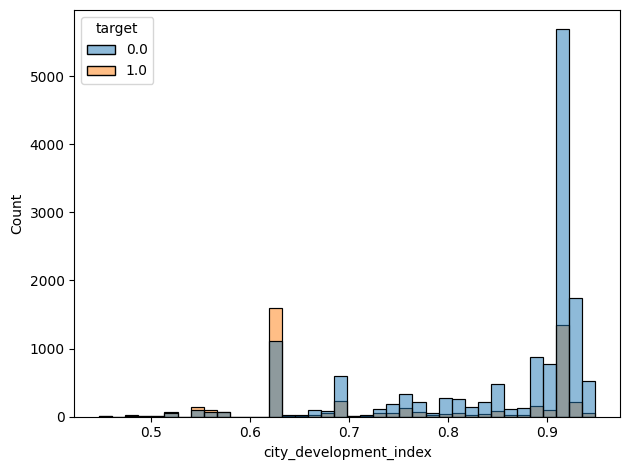

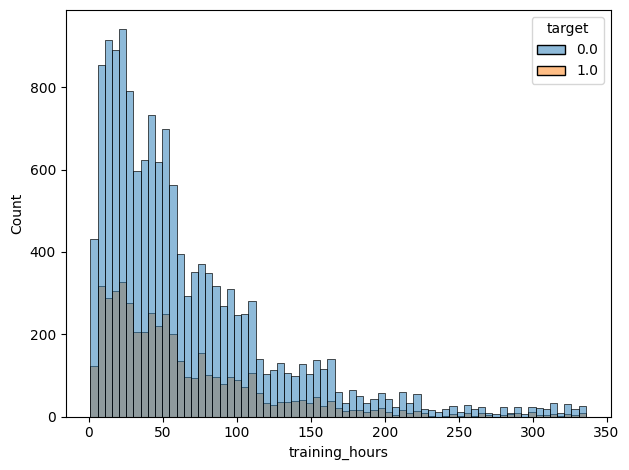

In [ ]:
for col in num_cols:
    sns.histplot(x=df_train[col],
                 hue=df_train[target_col])
    plt.tight_layout(h_pad=3)
    plt.show()

<a name="section-four-three"></a>

## **Multivariate Analysis**

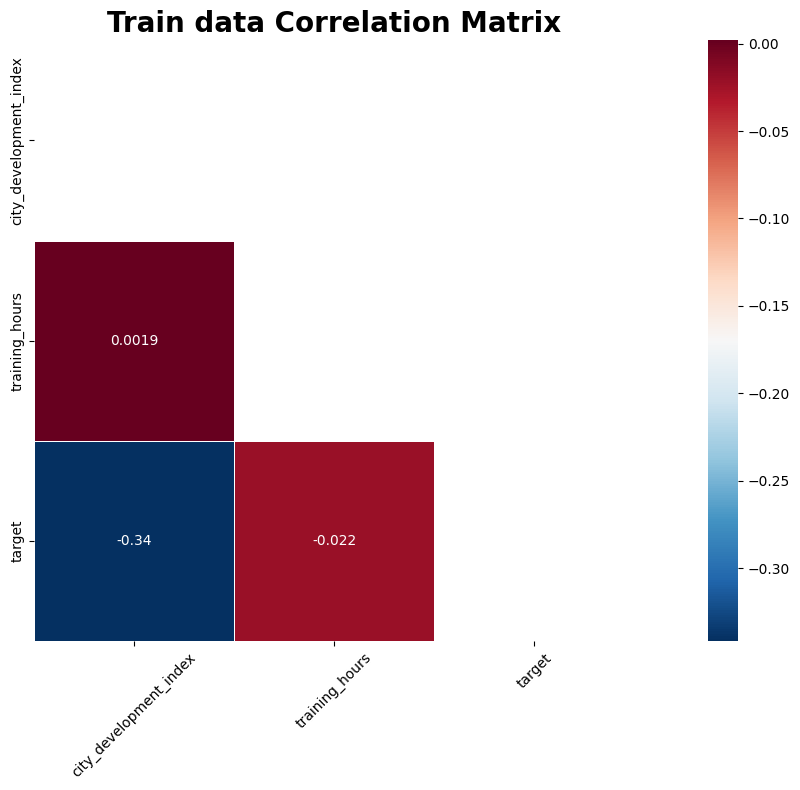

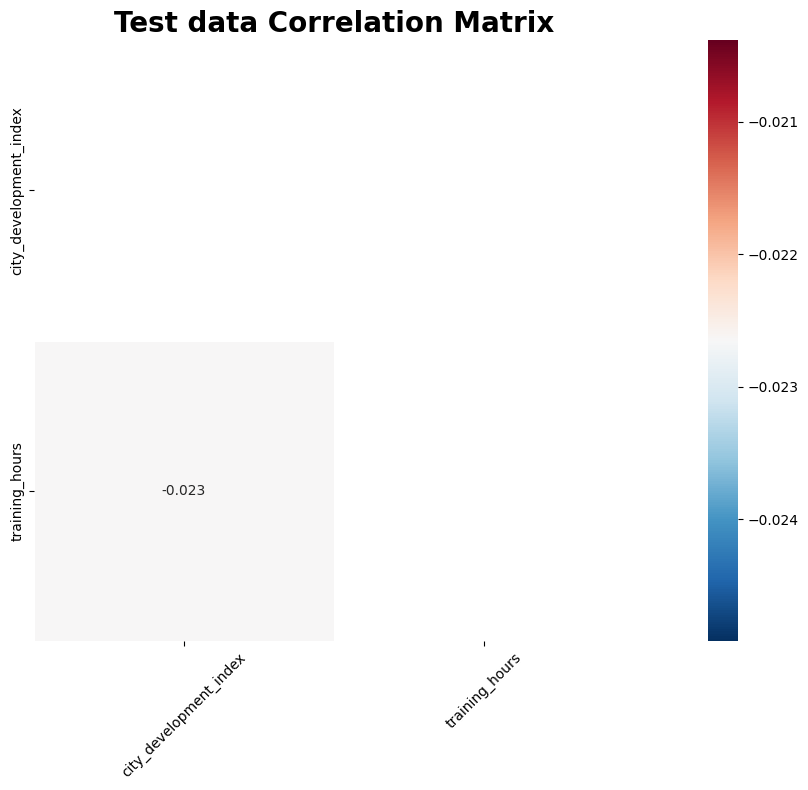

In [ ]:
def plot_heatmap(dataframe, title_key):
  plt.figure(figsize=(15,8))

  corr_mx = dataframe.corr(numeric_only=True)
  mask = np.triu(corr_mx)
  sns.heatmap(corr_mx,
              linewidths=0.5,
              square=True,
              cmap="RdBu_r",
              mask=mask,
              annot=True)
  plt.title(f"{title_key} Correlation Matrix", fontweight='bold', size=20)
  plt.xticks(rotation=45)
  plt.tight_layout()

plot_heatmap(df_train[num_cols + [target_col]], title_key='Train data')
plot_heatmap(df_test[num_cols], title_key='Test data')

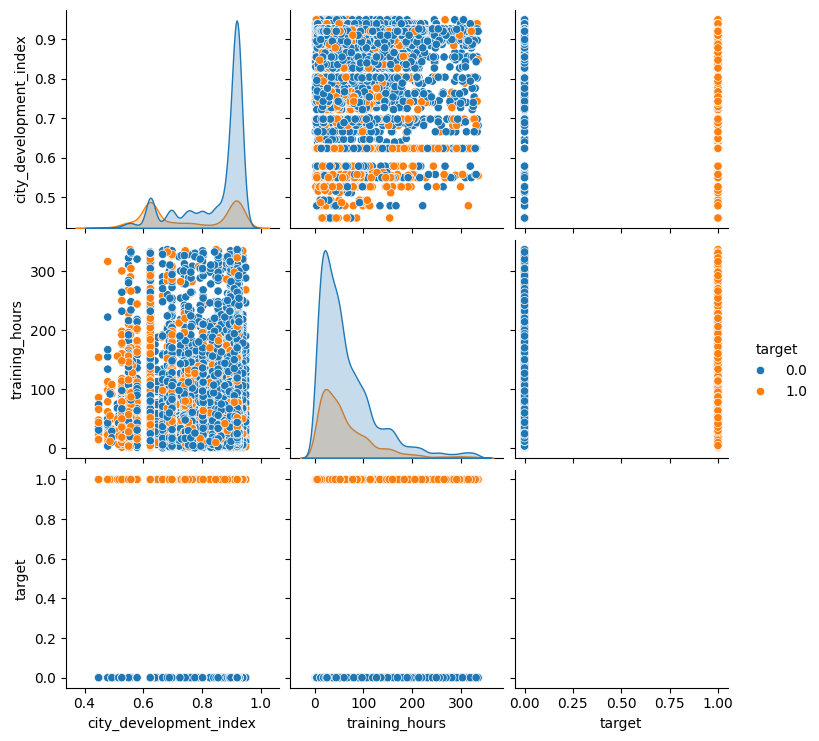

In [ ]:
sns.pairplot(data=df_train, vars=num_cols + [target_col], hue=target_col);

### Summarize EDA - Initial Analysis

The initial exploratory data analysis of the `df_train` DataFrame reveals the following key characteristics:

1.  **Dataset Dimensions and Duplicates**: The dataset comprises **19,158 entries (rows)** and **14 columns**. No duplicate rows were identified, indicating a clean dataset in terms of unique entries.

2.  **Data Types**: The DataFrame contains a mix of data types:
    *   **Numerical**: `float64` (2 columns: `city_development_index`, `target`) and `int64` (2 columns: `enrollee_id`, `training_hours`).
    *   **Categorical/Object**: `object` (10 columns including `city`, `gender`, `relevent_experience`, `enrolled_university`, `education_level`, `major_discipline`, `experience`, `company_size`, `company_type`, `last_new_job`).

3.  **Missing Values**: Several columns contain missing values, with `company_type` and `company_size` having the highest percentages:
    *   `company_type`: 6140 missing values (32.05%)
    *   `company_size`: 5938 missing values (30.99%)
    *   `gender`: 4508 missing values (23.53%)
    *   `major_discipline`: 2813 missing values (14.68%)
    *   `education_level`: 460 missing values (2.40%)
    *   `last_new_job`: 423 missing values (2.21%)
    *   `enrolled_university`: 386 missing values (2.01%)
    *   `experience`: 65 missing values (0.34%)

4.  **Descriptive Statistics for Numerical Columns**: For `df_train.describe().T`:
    *   The average `city_development_index` is approximately **0.83**, with a range from 0.45 to 0.95.
    *   `training_hours` averages around **65.37** hours, varying significantly from 1 to 336 hours.
    *   The `target` variable, indicating job change, has a mean of **0.25**, meaning about 25% of candidates are looking for a job change.

5.  **Numerical Correlations**: The correlation matrix for numerical features (`city_development_index`, `training_hours`, `target`) is displayed to visualize the linear relationships between these variables. This helps in understanding how `city_development_index` and `training_hours` might relate to the `target` variable, as well as to each other. Visualizing this with a heatmap and color gradient quickly highlights the strength and direction of these relationships.


## Insights from Detailed Analysis

### Categorical Feature Distributions (`cat_summary`):

*   **gender**: The dataset is predominantly male (69.01%), with a smaller percentage of females (6.46%) and a very small 'Other' category (1.00%).
*   **relevent_experience**: A large majority of candidates (71.99%) have relevant experience, while 28.01% do not.
*   **enrolled_university**: Most candidates (72.12%) are not enrolled in any university course, followed by 'Full time course' (19.61%) and 'Part time course' (6.25%).
*   **education_level**: 'Graduate' (60.54%) is the most common education level, followed by 'Masters' (22.76%) and 'High School' (10.53%). 'Phd' and 'Primary School' are less frequent.
*   **major_discipline**: 'STEM' (75.64%) is by far the most common major discipline, indicating a strong focus on technical backgrounds.
*   **company_size**: '50-99' (16.09%) and '100-500' (13.42%) are the most common company sizes, with '10000+' also being significant (10.54%). There's a wide range, but most companies are medium-sized.
*   **company_type**: 'Pvt Ltd' (51.24%) is the dominant company type, reflecting the private sector's large presence. Other types like 'Funded Startup' and 'Public Sector' are less common.
*   **last_new_job**: The most frequent last job change duration is '1' year (41.97%), followed by '>4' years (17.17%) and '2' years (15.14%). 'never' is also a notable category (12.80%).

#### Relationship with Target Variable (`target_summary_with_cat`):

*   **gender**: Females (0.263) and 'Other' (0.262) genders show a slightly higher mean target (job change likelihood) compared to Males (0.228).
*   **relevent_experience**: Candidates with 'No relevent experience' (0.338) are significantly more likely to be looking for a job change than those with 'Has relevent experience' (0.215).
*   **enrolled_university**: Candidates enrolled in a 'Full time course' (0.381) have the highest likelihood of job change, followed by 'Part time course' (0.252). Those with 'no_enrollment' (0.211) are less likely.
*   **education_level**: 'Graduate' (0.280) has the highest target mean. 'High School' (0.195), 'Masters' (0.214), 'Phd' (0.140), and 'Primary School' (0.133) have lower job change likelihoods, with Phd and Primary School being the lowest.
*   **major_discipline**: 'Other' (0.268) and 'Business Degree' (0.263) majors show slightly higher job change likelihoods, while 'STEM' (0.262), 'No Major' (0.247), 'Arts' (0.209) and 'Humanities' (0.211) are similar or lower.
*   **company_size**: '10/49' (0.234) shows the highest job change likelihood. Larger companies (e.g., '100-500', '1000-4999', '500-999', '<10', '50-99', '5000-9999', '10000+') generally show lower target means, suggesting employees in very small companies might be more prone to job change.
*   **company_type**: 'Early Stage Startup' (0.235) and 'Other' (0.240) company types have a higher likelihood of job change. 'Funded Startup' (0.140) shows a remarkably low job change rate, while 'Pvt Ltd' (0.181) also has a lower rate than the overall average.
*   **last_new_job**: Candidates who changed jobs '1' year ago (0.264) or 'never' (0.301) have a higher propensity for job change. The likelihood generally decreases as the 'last_new_job' duration increases (e.g., '>4' years has a mean of 0.182).

#### Target Interaction with Numerical Features (`target_summary_with_num`):

*   **city_development_index**: Candidates *not* looking for a job change (target=0) are associated with a higher mean `city_development_index` (0.853) compared to those *looking* for a job change (target=1) with a lower mean `city_development_index` (0.756). This suggests that individuals in less developed cities are more likely to seek job changes.
*   **training_hours**: There is a minimal difference in mean `training_hours` between target groups, with target=0 having 66.11 hours and target=1 having 63.12 hours. This suggests `training_hours` does not strongly differentiate between those looking for a job change and those who are not.

## Summarize Visualizations

### Univariate Analysis: Categorical Features
For categorical features, countplots were generated for both the `df_train` and `df_test` datasets. Each subplot displayed the count of observations for each category within a feature. This visualization allowed for a direct comparison of the distribution of categorical variables (e.g., `gender`, `relevent_experience`, `enrolled_university`, `education_level`, `major_discipline`, `company_size`, `company_type`, `last_new_job`) between the training and test sets, helping to identify any significant shifts or inconsistencies in data representation.

### Univariate Analysis: Numerical Features
For numerical features (`city_development_index`, `training_hours`), histograms with Kernel Density Estimation (KDE) were used to visualize their distributions. Separate histograms were plotted for `df_train` and `df_test` within the same subplot for each feature. This approach allowed for a clear visual comparison of how numerical values are distributed in both datasets, which is crucial for identifying potential discrepancies or biases that might affect model performance.

### Univariate Analysis: Target Variable
The target variable (`target`) was analyzed using both a countplot and a pie chart. The countplot displayed the absolute frequency of each class (0 - Not looking for job change, 1 - Looking for a job change), while the pie chart showed the percentage distribution of these classes. This analysis clearly highlighted the class imbalance present in the dataset, indicating that a significantly larger proportion of candidates are not looking for a job change (0) compared to those who are (1).

### Bivariate Analysis: Categorical vs. Target
For bivariate analysis between categorical features and the target variable, countplots were generated. In these plots, the categorical feature was placed on the x-axis, and the target variable (`target`) was used as a `hue` parameter. This approach allowed for a direct visual comparison of how the distribution of the target variable changes across different categories of each feature. By observing the counts of '0' and '1' for each category, insights could be gained into which categorical levels might be more strongly associated with a job change.

### Bivariate Analysis: Numerical vs. Target
For numerical features (`city_development_index`, `training_hours`), histograms were utilized to visualize their relationship with the target variable. By plotting the distribution of each numerical feature and using the `target` variable as a `hue`, it was possible to observe if specific ranges or patterns in the numerical data correlated with a higher or lower likelihood of job change. This visual inspection helps in understanding how numerical attributes might influence the target outcome.

## Summary:

### Data Analysis Key Findings

*   The training dataset contains 19,158 entries and 14 columns, with no duplicate rows found.
*   The dataset exhibits a mix of numerical (`int64`, `float64`) and categorical (`object`) data types.
*   Significant missing values are present across several columns: `company_type` (32.05%), `company_size` (30.99%), `gender` (23.53%), `major_discipline` (14.68%), `education_level` (2.40%), `last_new_job` (2.21%), `enrolled_university` (2.01%), and `experience` (0.34%).
*   The target variable, indicating job change, has a mean of 0.25, suggesting that approximately 25% of candidates are looking for a job change, highlighting a class imbalance.
*   **Key factors influencing job change likelihood:**
    *   Candidates with "No relevent experience" (0.338 job change likelihood) are significantly more likely to seek a job change than those with "Has relevent experience" (0.215).
    *   Individuals enrolled in a "Full time course" (0.381 likelihood) show the highest propensity for job change.
    *   Those who changed jobs "1" year ago (0.264 likelihood) or "never" (0.301 likelihood) are more prone to job change, while longer durations since the last job (e.g., ">4" years at 0.182 likelihood) are associated with lower rates.
    *   Candidates in less developed cities (mean `city_development_index` of 0.756 for target=1) are more likely to seek job changes compared to those not looking for a job change (mean `city_development_index` of 0.853).
*   The `enrollee_id` column was removed as it's a unique identifier and not predictive.
*   No outliers were detected in numerical features (`city_development_index`, `training_hours`) based on the 0.10 and 0.90 quantile thresholds.
*   The data analysis involved comprehensive visualizations, including univariate plots (countplots for categorical, histograms with KDE for numerical, countplot and pie chart for target), bivariate plots (categorical vs. target, numerical vs. target), and multivariate plots (correlation heatmaps, pairplots) to explore distributions and relationships.

### Insights or Next Steps

*   The substantial percentage of missing values, particularly in `company_type`, `company_size`, `gender`, and `major_discipline`, necessitates careful consideration of imputation strategies (e.g., mode imputation, advanced imputation techniques) or handling as a separate category during model building.
*   The identified class imbalance in the target variable (25% job change) suggests that techniques such as oversampling, undersampling, or using imbalanced-aware algorithms will be crucial during model training to avoid biased predictions towards the majority class.
